# Lập trình Bootstrap với Python

## Bài 3: Khoảng tin cậy có hiệu chỉnh sai số gia tăng (BCa CI)

**BS. Lê Ngọc Khả Nhi**

# Dẫn nhập

Thân chào các bạn, đây là bài thứ 3 trong loạt bài về chuyên đề lập trình Bootstrap với ngôn ngữ Python. Trong bài trước, chúng ta đã tìm hiểu về một trong những cách suy diễn thống kê trong quy trình Bootstrap, thông qua khoảng tin cậy; và nhận ra rằng chính Bootstrap đã làm cho việc ước tính khoảng tin cậy trở nên khả thi và dễ dàng như thế nào. 

Truy nhiên, cách ước tính khoảng tin cậy đơn giản bằng phân vị của chuỗi kết quả bootstrap sẽ dẫn đến nhiều nguy cơ, vì nó phụ thuộc quá nhiều vào yếu tố ngẫu nhiên của tiến trình chọn mẫu. Như ta biết, nếu không dùng bootstrap, ta chỉ có thể ước lượng một giá trị xác định và duy nhất của thông số thống kê mục tiêu cho mẫu. Giá trị ước lượng thực nghiệm này, kí hiệu: $\hat{\theta}$, thí dụ trung bình của mẫu, được xem là sự ước tính gần đúng cho thông số đó trong quần thể ($\theta$).

Khi dùng quy trình bootstrap, ta sinh ra một chuỗi nhiều giá trị ước lượng khả dĩ khác của thông số $\theta$ này, kí hiệu là $\hat{{\theta}'}$. Điều này có vẻ hay ho vì nó cho phép ước tính khoảng tin cậy (CI). Tuy nhiên, do yếu tố ngẫu nhiên, luôn có một khoảng sai biệt giữa ước lượng thực nghiệm $\hat{\theta}$ và trung bình bootstrap $\bar{{\theta}'}$:

$$Bias = \bar{{\theta}'} - \hat{\theta}$$

Sự tồn tại của Bias bootstrap sẽ làm ảnh hưởng đến tính chính xác của việc ước lượng khoảng tin cậy, đặc biệt khi dữ liệu có outliers. 

Để khắc phục nhược điểm này, ta có 2 cách: tăng số lượt bootstrap lên thật cao: Kích thước của sai biệt (bias) này có khuynh hướng thu nhỏ và đạt tối thiểu khi số lượt bootstrap tăng thêm; Người ta có quy luật rằng nếu Bias vượt quá giới hạn 1/4 giá trị SE thì cần tăng số lượt bootstrap lên cao hơn. Tuy nhiên dù tăng số lượt lấy mẫu lên cao bao nhiêu, sai biệt này vẫn luôn tồn tại.

Do đó, ta cần phải chủ động hiệu chỉnh sai biệt này để đảm bảo kết quả khoảng tin cậy được ổn định và chính xác. Hai kỹ thuật có thể áp dụng là (1) khoảng tin cậy có hiệu chỉnh sai biệt (Bias corrected confidence intervals: BC CI) và (2) Khoảng tin cậy có hiệu chỉnh sai biệt gia tăng (Bias corrected accelerated confidence intervals, hay BCa CI).


## Khoảng tin cậy có hiệu chỉnh sai biệt (BC.CI)

Đầu tiên, ta sẽ xác định tỉ lệ $P_{boot}$ của những giá trị $\hat{{\theta}'}$ thấp hơn so với giá trị ước lượng thực nghiệm $\hat{\theta}$

$$P_{boot} = P(\hat{{\theta}'} \leq\hat{\theta})$$

Từ giá trị $P_{boot}$ này, ta sẽ tính được hệ số hiệu chỉnh $z_{0}$ như sau:

$$z_{0} = Z^{-1}(P_{boot})$$

Với $Z^{-1}$ là hàm mật độ xác suất tích lũy nghịch đảo (ICDF) của một phân phối chuẩn hóa (Standard normal: phân phối chuẩn với trung bình = 0 và độ lệch chuẩn = 1, còn gọi là z-scores). thí dụ, $Z^{-1}(0.975) = 1.96$

Tiếp theo, ta sẽ áp dụng hệ số hiệu chỉnh $z_{0}$ này để kéo 2 phân vị của ngưỡng dưới và trên trong tin cậy về bên trái hay bên phải một khoảng = $z_{0}$

$$Y_{95}L = z_{0} + Z^{-1} \left ( \frac{\alpha}{2} \right )$$

$$Y_{95}U = z_{0} + Z^{-1} \left(1 - \left ( \frac{\alpha}{2} \right )\right)$$

Như vậy, ta sẽ ước tính khoảng tin cậy 95% bằng 2 phân vị mới là $Y_{95}L$ và $Y_{95}U$, thay vì 0.025 và 0.975 như thông thường:

$$$Y_{95}L = Z(z_{0} + Y_{95}L)$$
$$$Y_{95}U = Z(z_{0} + Y_{95}U)$$

Với Z() là hàm mật độ xác suất tích lũy (CDF) của phân phối chuẩn hóa. 

## Khoảng tin cậy có hiệu chỉnh sai biệt gia tăng (BCa.CI)

Từ kỹ thuật BC CI nêu trên, ta sẽ đi xa hơn một bước, với kỹ thuật BCa CI. Tên gọi này chỉ khác ở chỗ có thêm chữ **a** (accelerated). Thuật ngữ 'acceleration' ở đây liên quan đến sự gia tăng của một hệ số $a$, đo lường tốc độ biến đổi của giá trị SE bootstrap của giá trị ước lượng $\hat{{\theta}'}$.

Trong kỹ thuật BCaCI, ta vận dụng một quy trình tái chọn mẫu khác không mang tính ngẫu nhiên, đó là jackknife. Cơ chế của jackknife là "tái chọn mẫu bỏ bớt một phần tử" (leave one out resampling). Thí dụ từ một tập hợp có n phần tử [a,b,c,d], jackknife resampling sẽ sinh ra n mẫu có kích thước (n-1), mỗi lượt rút bớt 1 phần tử: lần lượt là [b,c,d], [a,c,d], [a,b,d] và [a,b,c].

Ta sẽ ước tính thông số thống kê $\theta$ cho mỗi lượt tái chọn mẫu Jackknife, và có được giá trị trung bình $\ddot{\theta_{.}}$. Từ đó, ta tính được sai số chuẩn (SE) Jackknife cho mẫu như sau:

$$SE_{jacknife}(\hat{\theta}) = \sqrt{\frac{n-1}{n}\sum_{i=1}^{n}\left(\ddot{\theta}_{i}-\ddot{\theta}_{.}\right )^{2}}$$

Trong đó, $\ddot{\theta}_{.}$ là trung bình của chuỗi kết quả ước lượng từ n lượt tái chọn mẫu jackknife và $\ddot{\theta}_{i}$ là kết quả ước lượng của mỗi lượt tái chọn mẫu Jackknife. 

Dựa vào quy trình tái chọn mẫu Jackknife mang tính xác định (không có yếu tố ngẫu nhiên) này, ta ước tính được hệ số gia tăng $a$:

$$a = \frac{\sum_{i=1}^{n} \left(\ddot{\theta}_{i}-\ddot{\theta}_{.}\right )^{3}}{6 \left \{\sum_{i=1}^{n} \left(\ddot{\theta}_{i}-\ddot{\theta}_{.}\right )^{2}\right \}^{1.5}}$$

Sau khi tính được hệ số gia tăng $a$, ta tiến hành ước tính 2 phân vị hiệu chỉnh như trong kỹ thuật BC, nhưng lần này với 1 phân số gồm tử số và mẫu số:

$$Y_{95}L =  \frac{z_{0} + Z^{-1} \left ( \frac{\alpha}{2} \right )}{1 - a\left \{ z_{0} + Z^{-1} \left ( \frac{\alpha}{2} \right )\right \}} $$

$$Y_{95}U =  \frac{z_{0} + Z^{-1} \left (1- \frac{\alpha}{2} \right )}{1 - a\left \{ z_{0} + Z^{-1} \left ( 1- \frac{\alpha}{2} \right )\right \}} $$

Như vậy, trong trường hợp a = 0, kết quả BCa CI sẽ tương đương với BC CI, giá trị a càng nhỏ thì kết quả BCa CI càng khác biệt lớn so với kết quả BC CI. Khi $Z_{0} = 0$, tức là sai biệt bias = 0, thì kết quả BC hay BCa cũng chính là kết quả CI thông thường.

# Triển khai kỹ thuật BCa.CI 

Trong bài thực hành này, Nhi sẽ hướng dẫn các bạn triển khai kỹ thuật Khoảng tin cậy hiệu chỉnh sai số gia tăng (BCa.CI) bằng 3 cách khác nhau:

+ Lập trình sơ cấp hoàn toàn sử dụng Python;

+ Sử dụng numpy và scipy (chạy trên CPU)

+ Sử dụng Pytorch (chạy trên GPU)

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import torch

import matplotlib.pyplot as plt

## Thí dụ minh họa

Nhi dùng lại dữ liệu bệnh nhân ILD, nhưng lần này ta khảo sát 1 đại lượng khác là thể tích phế nang VA:

In [6]:
path = 'https://raw.githubusercontent.com/kinokoberuji/Statistics-Python-Tutorials/master/Schleroderma.csv'
df = pd.read_csv(path, sep = ';', decimal = ',')

sample_va = df[df['ILD'] == 'Positive']['VA'].values

print(sample_va.size)
sample_va[:10]

133


array([3.98, 5.23, 2.74, 2.8 , 5.88, 3.04, 4.59, 3.7 , 4.57, 5.91])

In [8]:
sample_va.mean() # trung bình mẫu

4.065639097744361

Mục tiêu: Ước tính BCA_CI của trung bình VA ; biết rằng trung bình mẫu = 4.06 L

## Lập trình hoàn toàn thủ công

**Hàm thống kê cơ bản**

Trong phần này, Nhi chỉ dùng lại phần lớn mã lập trình của tác giả Felix Bittmann, trong quyển 
Bootstrapping - An Integrated Approach with Python and Stata (2021); https://doi.org/10.1515/9783110693348.

In [7]:
### MODULE Thống kê

import math
from statistics import mean

# Ước lượng xấp xỉ hàm CDF nghịch đảo của phân phối chuẩn hóa Z

def rational_approximation(t):
	#Source: https://www.johndcook.com/blog/python_phi_inverse/
	# Abramowitz and Stegun formula 26.2.23.
	# The absolute value of the error should be less than 4.5 e-4.
	c = [2.515517, 0.802853, 0.010328]
	d = [1.432788, 0.189269, 0.001308]
	numerator = (c[2] * t + c[1]) * t + c[0]
	denominator = ((d[2] * t + d[1]) * t + d[0]) * t + 1
	return t - (numerator / denominator)

def inverse_normal_CDF(p):
	assert 0 < p < 1
	if p < 0.5:
		# F^-1(p) = - G^-1(p)
		return round(-rational_approximation(math.sqrt(-2 * math.log(p))), 4)
	else:
		# F^-1(p) = G^-1(1-p)
		return round(rational_approximation(math.sqrt(-2 * math.log(1 - p))), 4)
    
# Hàm CDF của phân phối chuẩn hóa Z
def normal_CDF(x):
	"""Cumulative distribution function for the standard normal distribution"""
	return (1 + math.erf(x / math.sqrt(2))) / 2

# Hàm tái chọn mẫu bớt một (Jackknkfe resampling)

def jackknife(func, data):
	"""Calculates the jackknife coefficients for a given list"""
	output = []
	for element in data:
		copylist = data[:]		#Copy original list
		copylist.remove(element)
		coef = func(copylist)
		output.append(coef)
	return output

# Hàm tính hệ số acceleration

def acceleration_coefficient(func, data):
	"""Calculates the acceleration coefficient for a given list"""
	jackvalues = jackknife(func, data)
	mean_jackvalues = mean(jackvalues)
	nominator, denominator = 0, 0
	for element in jackvalues:
		nominator += (mean_jackvalues - element) ** 3
		denominator += (mean_jackvalues - element) ** 2
	return nominator / (6 * (denominator ** 1.5))

**Module ước tính phân vị**

Nhi dùng lại các hàm Nhi đã viết trong bài 2:

In [46]:
def heapify(array, n, i):
    """Hàm chuyển array thành Heap"""
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2
    
    if l < n and array[i] < array[l]:
        largest = l
        
    if r < n and array[largest] < array[r]:
        largest = r
        
    if largest != i:
        array[i], array[largest] = array[largest], array[i]
        heapify(array, n, largest)

def heapSort(array):
    """Hàm thực hiện Heap sort"""
    n = len(array)

    for i in range(n, -1, -1):
        heapify(array, n, i)

    for i in range(n-1, 0, -1):
        array[i], array[0] = array[0], array[i]
        heapify(array, i, 0)

    return array

def basic_quantile(data, p:float):

    assert 0 <= p <= 1, "Lỗi: Phân vị phải nằm trong khoảng [0-1]"
    
    data = heapSort(data.copy())
    loc = (len(data) - 1) * p

    lower = math.floor(loc)
    d0 = data[lower] * ((lower + 1) - loc)
    d1 = data[lower + 1] * (loc - lower)
        
    return d0 + d1

**Quy trình BCa_CI**

In [47]:
### Hàm tính BCA CI của trung bình bootstrap

from random import choices

def CI_BCa(data: np.array, func = mean, reps = 5000, bca = True):
	theta_hat = func(data)
	theta_hat_stars = []
	for i in range(reps):
		resample = choices(data, k=len(data))
		theta_hat_star = func(resample)
		theta_hat_stars.append(theta_hat_star)
	n_smaller = sum([1 for theta_hat_star in theta_hat_stars if theta_hat_star <= theta_hat])
	share_smaller = n_smaller / len(theta_hat_stars)
	z0 = inverse_normal_CDF(share_smaller)	#0.975 --> 1.96
	if not bca:		#compute BC
		lower = normal_CDF(2 * z0 - 1.96)	#1.96 --> 0.975
		upper = normal_CDF(2 * z0 + 1.96)
	else:			#compute BCa
		a = acceleration_coefficient(func, data)
		lower = normal_CDF(z0 + ((z0 - 1.96) / (1 - a * (z0 - 1.96))))
		upper = normal_CDF(z0 + ((z0 + 1.96) / (1 - a * (z0 + 1.96))))
	CI_lower = basic_quantile(theta_hat_stars, lower)
	CI_upper = basic_quantile(theta_hat_stars, upper)
    
	bca_ci = {f"{lower:.5f}": CI_lower, f"{upper:.5f}": CI_upper}
    
	return theta_hat_stars, bca_ci

Nhi viết thêm 1 hàm để vẽ biểu đồ tuyến kí, để khảo sát trực quan tính ổn định của chuỗi kết quả bootstrap và giới hạn của BCA CI:

In [48]:
def trace_plot(x, hex_col = '#eb347d', q = [0.025,0.975]):
    plt.rcParams["figure.figsize"] = (12,2.5)

    plt.plot(np.arange(0,x.size),
             x,
             lw=0.5, 
             alpha = 0.7,
             c = hex_col)
    
    plt.hlines([x.mean()]+list(np.quantile(x,q)),
               0.,x.size,
               colors=['k','#140078','#780400'],
               alpha= 0.9,
               lw=1.5,
               linestyles='dashed')

    plt.show()

Áp dụng hàm CI_BCa ở trên cho array sample_va, ta có:

In [49]:
boot_means, bca_ci = CI_BCa(data = list(sample_va), 
                            func = mean, 
                            reps = 5000,
                            bca = True)

In [45]:
boot_means[:10]

[3.775338345864662,
 3.7803007518796994,
 3.809473684210526,
 3.821578947368421,
 3.823157894736842,
 3.823533834586466,
 3.8263157894736843,
 3.827669172932331,
 3.8284210526315787,
 3.829172932330827]

In [50]:
bca_ci

{'0.03330': 3.9078563612580592, '0.98188': 4.250979002267268}

Theo kết quả này, BCA-CI được ước tính trên 2 phân vị hiệu chỉnh là  0.033 và 0.98

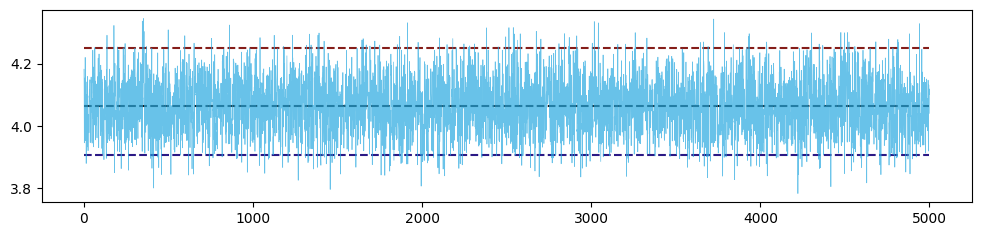

In [52]:
trace_plot(np.array(boot_means), 
           hex_col = '#28a9e0', 
           q = [float(i) for i in bca_ci.keys()])

## Quy trình BCA-CI sử dụng numpy và scipy

Tiếp theo, Nhi sẽ viết lại toàn bộ quy trình BCA-CI, bao gồm các hàm thống kê, Jackknife resampling và bootstrap; sử dụng 2 thư viện numpy và scipy. Quy trình này chạy trên CPU và có tốc độ nhanh hơn so với khi dùng list và module math trong Python.

**Jackknife trong numpy**

In [53]:
### Jacknife 

def np_jackknife(data: np.array, func = np.mean):
    
    k = data.size
    output = np.zeros(k)
    
    for i in range(k):
        reduced_arr = np.delete(data, i)
        output[i] = func(reduced_arr)
        
    return output

**Hàm tính hệ số gia tăng a, sử dụng numpy**

In [54]:
### Acceleration coefficient

def np_acc_coef(data: np.array, func = np.mean):
    
    jknf_vals = np_jackknife(data, func)
    mean_jknf = np.mean(jknf_vals)
    
    nominator, denominator = 0., 0.
    
    for element in jknf_vals:
        nominator += (mean_jknf - element) ** 3.
        denominator += (mean_jknf - element) ** 2.
    
    return nominator / (6. * (denominator ** 1.5))

**Quy trình BCA_CI dùng numpy & Scipy**

In [55]:
def np_BCa_CI(data: np.array, 
              n_iter = 5000, 
              func = np.mean, 
              BCa = True):
    
    k = data.size
    sample_estimate = func(data)
    boot_estimates = np.zeros(n_iter)
    
    for i in range(n_iter):
        
        boot_sampl = np.random.choice(data,
                                      size = k, 
                                      replace=True)
        
        boot_estimates[i] = func(boot_sampl)
    
    lower_ratio = boot_estimates[boot_estimates <= sample_estimate].size / n_iter
    z0 = stats.norm.ppf(lower_ratio) # #0.975 --> 1.96
    
    a = np_acc_coef(data, func)
    lower = stats.norm.cdf(z0 + ((z0 - 1.96) / (1 - a * (z0 - 1.96)))) 
    upper = stats.norm.cdf(z0 + ((z0 + 1.96) / (1 - a * (z0 + 1.96)))) # 1.96 --> 0.975
    
    BCa_ci = np.quantile(boot_estimates, [lower, upper])
    
    np_bca_ci = {f"{lower:.5f}": BCa_ci[0],
                 f"{upper:.5f}": BCa_ci[1]}
    
    return boot_estimates, np_bca_ci

Áp dụng quy trình này cho sample_VA, ta có:

In [57]:
np_boot_means, ci = np_BCa_CI(data = sample_va, 
                          n_iter = 5000, 
                          func = np.mean, 
                          BCa = True)

In [58]:
np_boot_means

array([4.11977444, 4.01932331, 4.09503759, ..., 4.05819549, 4.13819549,
       4.08518797])

In [59]:
ci

{'0.02967': 3.905212671172956, '0.97929': 4.245864661654136}

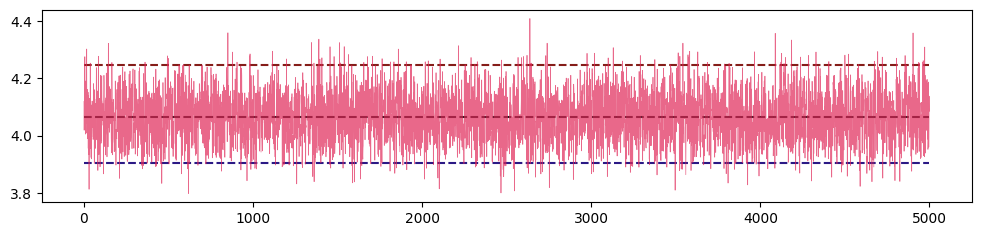

In [60]:
trace_plot(np_boot_means, 
           hex_col = '#e02859', 
           q = [float(i) for i in ci.keys()])

## Quy trình BCA-CI trên GPU sử dụng Pytorch

Cuối cùng, Nhi viết lại toàn bộ quy trình BCA-CI sử dụng thư viện Pytorch, quy trình này sẽ thi hành trên GPU với tốc độ cực kì nhanh, ta có thể tăng số lượt bootstrap lên 50 ngàn lượt.

Ghi chú: Bài này Nhi không thể sử dụng Cupy, vì thư viện này chưa hỗ trợ các hàm CDF và ICDF như trong scipy.

**Hàm Jackknife dùng pytorch**

In [61]:
def tor_delete_by_idx(tensor, idx):
        
    mask = torch.ones(tensor.numel(), 
                      device = 'cuda',
                      dtype=torch.bool)
    
    mask[idx] = False
    
    return tensor[mask]

def tor_jackknife(data: torch.tensor, func = torch.mean):
    
    k = data.numel()
    
    output = torch.zeros(size = (k,), 
                         device = 'cuda', 
                         dtype = torch.float32)
        
    for i in range(k):
        copy_data = torch.clone(data)
        reduced_tensor = tor_delete_by_idx(data, i)
        output[i] = func(reduced_tensor)
    
    return output

**Hàm tính hệ số gia tăng a bằng Pytorch**

In [63]:
def tor_acc_coef(data: torch.tensor, func = torch.mean):
    
    jknf_vals = tor_jackknife(data, func)
    mean_jknf = func(jknf_vals)
    k = data.numel()
    
    nominator = torch.zeros(size = (1,), 
                            device = 'cuda', 
                            dtype = torch.float32)
    
    denominator = torch.clone(nominator)
    
    for element in jknf_vals:
        nominator += (mean_jknf - element) ** 3.
        denominator += (mean_jknf - element) ** 2.
    
    return nominator / (6. * (denominator ** 1.5))

**Hàm sinh mẫu ngẫu nhiên Pytorch**

In [64]:
def torch_boot_idx(pop_size, num_samples):
        p = torch.ones(pop_size, device='cuda') / pop_size
        return p.multinomial(num_samples=num_samples, replacement=True)
    
def tor_quantiles(data, q = [0.025, 0.975]):
    tor_quants = [data.quantile(i).item() for i in q]
    return tor_quants

**Quy trình BCA-CI hoàn toàn dùng Pytorch**

In [65]:
def Tor_BCa_CI(data: torch.tensor, 
               func = torch.mean,
              n_iter = 5000):
    
    k = data.numel()
    
    sample_estimate = func(data)
    
    boot_estimates = torch.zeros(size = (n_iter,), 
                                 device = 'cuda', 
                                 dtype = torch.float32)
    
    for i in range(n_iter):
        
        tor_idx = torch_boot_idx(pop_size = k, 
                                 num_samples = k)
        
        boot_sampl = data[tor_idx]
        theta = func(boot_sampl)
        
        boot_estimates[torch.tensor(i)] = theta.item()
        
    lower_ratio = boot_estimates[boot_estimates <= sample_estimate].shape[0]/n_iter
    
    std_normal = torch.distributions.Normal(0, 1)
    
    z0 = std_normal.icdf(torch.tensor(lower_ratio, device = 'cuda')) #0.975 --> 1.96
    
    a = tor_acc_coef(data, func)
    
    lower = std_normal.cdf(z0 + ((z0 - 1.96) / (1 - a * (z0 - 1.96)))) 
    upper = std_normal.cdf(z0 + ((z0 + 1.96) / (1 - a * (z0 + 1.96)))) # 1.96 --> 0.975
        
    BCa_ci =[boot_estimates.quantile(i).item() for i in [lower, upper]]
        
    tor_bca_ci = {f"{lower.item():.5f}": BCa_ci[0],
                 f"{upper.item():.5f}": BCa_ci[1]}
    
    return boot_estimates, tor_bca_ci

Ta áp dụng quy trình trên cho sample_va với 50,000 lượt bootstrap; tốc độ thi hành rất nhanh, chỉ mất khoảng 5 giây !

In [67]:
tor_x = torch.tensor(sample_va, 
                     device = 'cuda', 
                     dtype = torch.float32)

In [74]:
tor_boot_means, tor_Bca = Tor_BCa_CI(data = tor_x, 
                                     func = torch.mean,
                                     n_iter = 5000 * 10)

In [77]:
tor_boot_means

tensor([4.1511, 4.0665, 4.0951,  ..., 4.1431, 4.0040, 4.0040], device='cuda:0')

In [78]:
tor_Bca

{'0.02923': 3.906090497970581, '0.97894': 4.247218132019043}

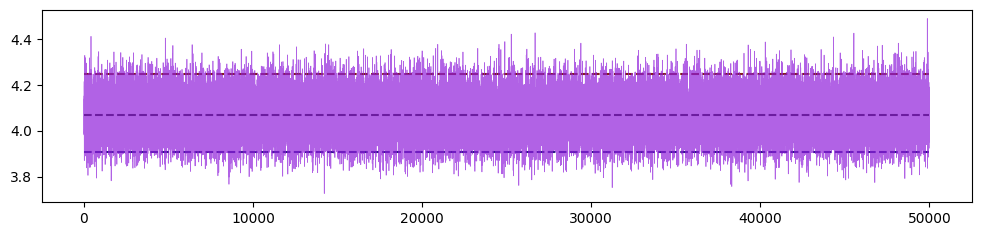

In [79]:
trace_plot(tor_boot_means.cpu().numpy(),
           hex_col = '#901fdb', 
           q = [float(i) for i in tor_Bca.keys()])

# Tổng kết

Nhi xin tóm tắt những thông điệp chính trong bài:

+ Để khắc phục hiện tượng sai biệt do tác động của quy trình chọn mẫu ngẫu nhiên trong bootstrap, và đảm bảo độ tin cậy của kết quả CI, ta có thể áp dụng kỹ thuật hiệu chỉnh sai biệt gia tăng (BCa)

+ Quy trình BCa kết hợp bootstrap thông thường và quy trình tái chọn mẫu bớt một (Jackknife), phân phối chuẩn hóa (hàm CDF, ICDF) để hiệu chỉnh lại phân vị của CI.

+ Kết quả của BCa-CI chính xác và ổn định hơn so với CI dựa vào phân vị thông thường (không có hiệu chỉnh);

+ Có thể triển khai kỹ thuật BCA-CI hoàn toàn sơ cấp trong Python, hoặc dùng numpy & Scipy, cũng như chạy trên cả GPU với Pytorch.

Bài thực hành đến đây là hết. Chúc các bạn thực hành vui.